# Phân tích dữ liệu Bệnh Đái Tháo Đường 

# Bài làm

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
## Nạp dataset 
df=pd.read_csv('pima-indians-diabetes.csv',header = None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## EDA
### Nhận thấy dataset chưa được gắn nhãn dữ liệu. Tiến hành gán nhãn dữ liệu.

In [6]:
df.columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



### Tiến hành xử lí dữ liệu bị mất . Nhận thấy tại các cột có rất nhiều dữ liệu bị 0 .

In [22]:
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_missing:
    df[col] = df[col].replace(0, np.nan)      # thay 0 bằng NaN
    df[col] = df[col].fillna(df[col].median()) 

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Trực quan hóa dữ liệu 

### 1. Tỷ lệ mắc bệnh (Outcome)

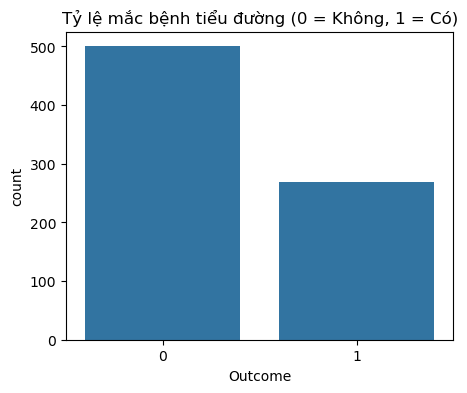

In [13]:
# Tỷ lệ Outcome
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Outcome")
plt.title("Tỷ lệ mắc bệnh tiểu đường (0 = Không, 1 = Có)")
plt.show()

#### Nhận thấy rằng khoảng 65% không mắc bệnh và 35% mắc bệnh.
#### Dữ liệu hơi mất cân bằng nhưng vừa đủ để có thể tiến hành huấn luyện

### 2. Phân phối Glucose theo Outcome

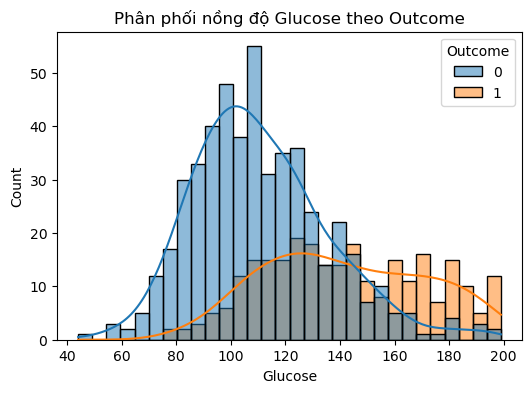

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Glucose", hue="Outcome", bins=30, kde=True)
plt.title("Phân phối nồng độ Glucose theo Outcome")
plt.show()

#### Người mắc bệnh tiểu đường rõ ràng có lượng Glucozo cao hơn rõ rệt
#### Lượng đường trong máu của một người bình thường được phân bố trong khoảng [80;130].
#### Ở biên độ 140 đổ tới trước lượng đường của người bệnh thấp hơn rõ rệt , điều này lí giải người bệnh thường xuyên bị hạ đường huyết đột ngột
#### Glucozo là một biến quan trọng nhất để chuẩn đoán.

### 3. Phân phối BMI theo Outcome

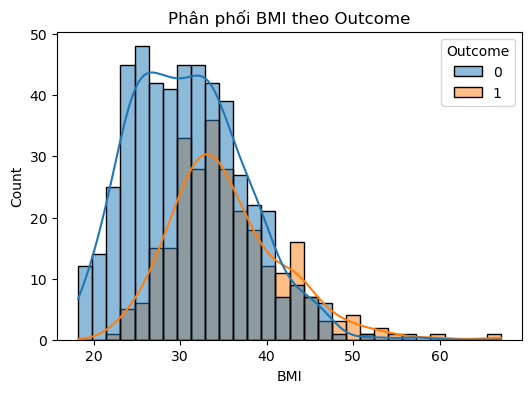

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="BMI", hue="Outcome", bins=30, kde=True)
plt.title("Phân phối BMI theo Outcome")
plt.show()

#### Theo phân tích ta thấy bệnh phổ biến ở người có tiền sử bệnh Béo Phì.
#### Nhóm mắc tiểu đường có xu hướng BMI cao hơn.
#### Điều này phù hợp với y học: béo phì là yếu tố nguy cơ lớn cho tiểu đường type 2.

### 4. Phân phối Tuổi theo Outcome

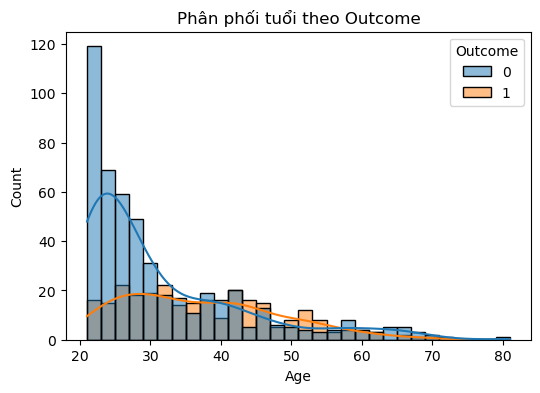

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Age", hue="Outcome", bins=30, kde=True)
plt.title("Phân phối tuổi theo Outcome")
plt.show()

#### Người mắc tiểu đường thường lớn tuổi hơn (đa số > 30).
#### Có dấu hiệu bệnh tăng ở người 20-30 tuổi , điều này là một điểm rất đáng quan ngại
#### Tuổi là một yếu tố nguy cơ tiềm ẩn.

### 5. Boxplot BMI theo Outcome

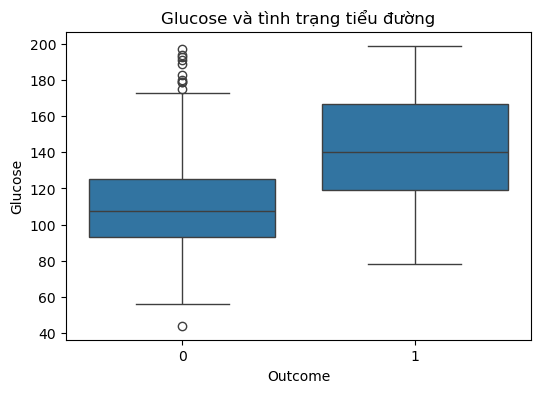

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Outcome", y="Glucose")
plt.title("Glucose và tình trạng tiểu đường")
plt.show()

#### Nhóm mắc bệnh có Glucose trung bình cao hơn hẳn.
#### Rõ ràng đây là chỉ số quyết định trong chẩn đoán.

### 6. Ma trận tương quan

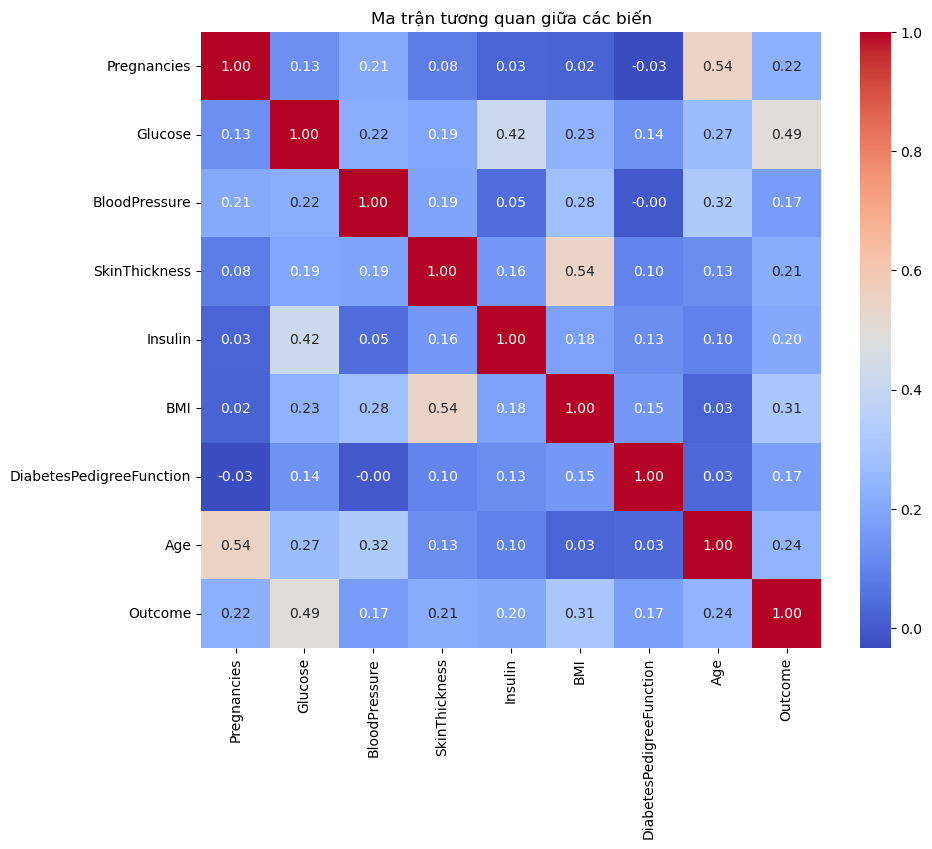

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

#### Glucose ↔ Outcome: tương quan mạnh nhất.
#### BMI, Tuổi, DiabetesPedigreeFunction cũng có tương quan dương.
#### Các biến khác như BloodPressure, SkinThickness có liên quan yếu.
#### Có một điểm đặc biệt là Age và Pregnancies đặc biệt tương quan mạnh , người phụ nữ có nhiều lần mang thai có thể có nguy cơ cao hơn, đặc biệt là nếu có tiểu đường thai kỳ (Gestational Diabetes) → dễ dẫn đến tiểu đường type 2 sau này

## Train Mô Hình

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Logistic Regression:
Accuracy: 0.7077922077922078
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Random Forest:
Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



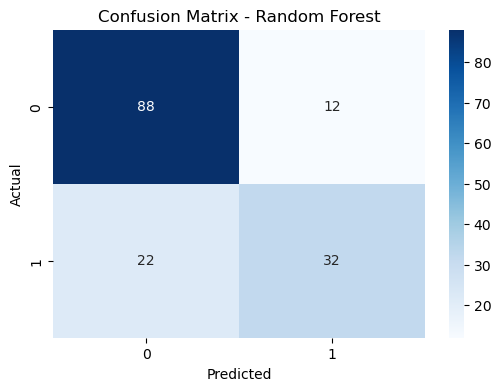

In [20]:
# Chia dữ liệu train/test
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # RandomForest không cần chuẩn hóa
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Ma trận nhầm lẫn
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Precision cho lớp 1 (mắc bệnh) không quá cao → mô hình có xu hướng dự đoán nhầm một số người không mắc thành có mắc.
#### Recall của lớp 1 thường cao hơn, nghĩa là mô hình phát hiện được phần lớn bệnh nhân tiểu đường, điều này quan trọng trong y tế (ưu tiên không bỏ sót).
#### Các biến Glucose, BMI, Tuổi, số lần mang thai đóng vai trò quan trọng.
#### Kết quả phù hợp với thực tế y học: người có glucose cao, BMI cao, lớn tuổi, nhiều lần mang thai có nguy cơ cao hơn.
#### Mô hình đã cho kết quả chấp nhận được (~75–80% accuracy).
#### Random Forest vượt trội hơn Logistic Regression về độ chính xác.
#### Tuy nhiên, Logistic Regression có lợi thế dễ diễn giải, phù hợp nếu cần giải thích cho bác sĩ/nhà nghiên cứu.

# END

In [25]:
!jupyter nbconvert --to html Untitled.ipynb

[NbConvertApp] Converting notebook Untitled.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 648382 bytes to Untitled.html
